<a href="https://colab.research.google.com/github/Barrok/Iris/blob/main/script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First step is of course import of required libraries


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

Let's load our data

In [4]:
iris = pd.read_csv(r"iris.data",
                   header = None, 
                   names = ['petal length', 'petal width', 
                            'sepal length', 'sepal width', 'species'])

In [5]:
# we can check size of loaded set, if our object has multiple dimensions, it is possible to check them separatetly
# sometimes in ML scripts it is neccessary to iniciate size of other objects depending on the size of our input data
# for this purpose I'll use function shape()
iris.head()
 
iris.shape
iris.shape[0]
iris.shape[1]

5

In [6]:
# basic statistics
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
petal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
petal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
sepal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
sepal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


At this moment let's visualize how vaules of parameters look like(dispersion in values). First step is definition of min and max value of 2 columns.

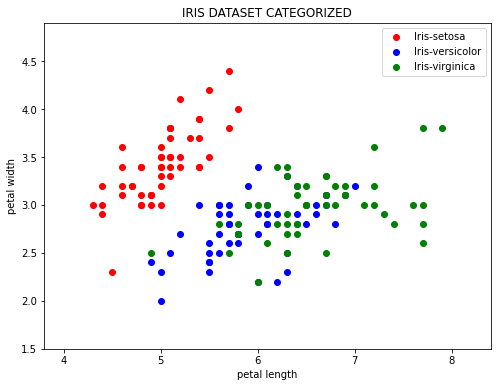

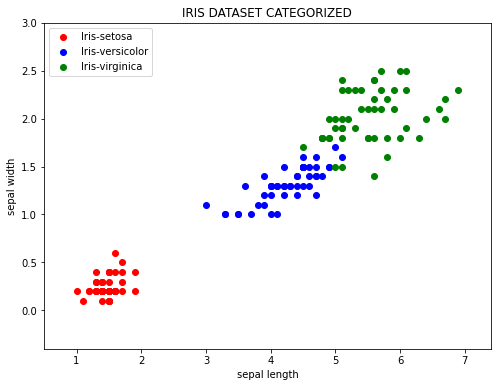

In [7]:
x_min, x_max = iris['petal length'].min() - .5, iris['petal length'].max() + .5
y_min, y_max = iris['petal width'].min() - .5, iris['petal width'].max() + .5
 
# definition of dictionary which contains colors for flower species
colors = {'Iris-setosa':'red', 'Iris-versicolor':'blue', 'Iris-virginica':'green'}
 
# creation of an object responsible for drawing our plot and its axes
fig, ax = plt.subplots(figsize=(8, 6))
 
# grouping data by species and draw data
# function will return a key which identifies group name(flower species) and samples from each group
# this will allow us to draw each species in different color
for key, group in iris.groupby(by='species'):
    plt.scatter(group['petal length'], group['petal width'], 
                c=colors[key], label=key)
 
# let's add legend and description of axes 
ax.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
ax.set_title("IRIS DATASET CATEGORIZED")
 
plt.show()
 
# now I'll do the same for sepal, the difference in code is minimal 
x_min, x_max = iris['sepal length'].min() - .5, iris['sepal length'].max() + .5
y_min, y_max = iris['sepal width'].min() - .5, iris['sepal width'].max() + .5
 
colors = {'Iris-setosa':'red', 'Iris-versicolor':'blue', 'Iris-virginica':'green'}
 
fig, ax = plt.subplots(figsize=(8, 6))
 
for key, group in iris.groupby(by='species'):
    plt.scatter(group['sepal length'], group['sepal width'], 
                c=colors[key], label=key)
 
ax.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
ax.set_title("IRIS DATASET CATEGORIZED")
 
plt.show()


Let's verify dependency of 1 parameter from the rest

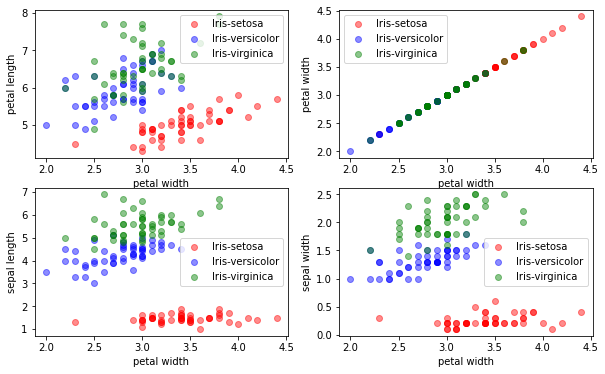

In [8]:
# lets combine a few plots in 1
fig, ax = plt.subplots(2,2,figsize=(10, 6))
plt_position = 1

# visualisation of dependency of petal width from other variables(columns)
feature_x= 'petal width'
 
# for each parameter descibing flower species
for feature_y in iris.columns[:4]:
 
    # choose next subplot
    plt.subplot(2, 2, plt_position) 
 
    # draw plot for each species (these 3 plots overlap each other,
    # which allows to generate plot legend automatically)
    for species, color in colors.items():
        # before we draw our plot, we need to filter our data by flower species
        # loc function will be perfect for this task, it will return rows,
        # where value of the sentence in brackets is True
        plt.scatter(iris.loc[iris['species']==species, feature_x],
                    iris.loc[iris['species']==species, feature_y],
                    label=species,
                    alpha = 0.45, # transparency
                    color=color)
 
    # description of plot
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend()
    plt_position += 1
 
plt.show()

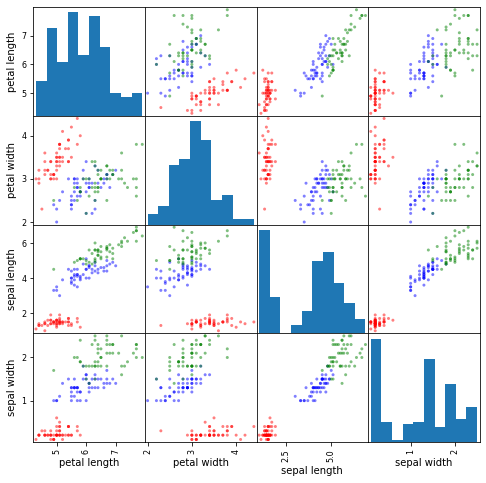

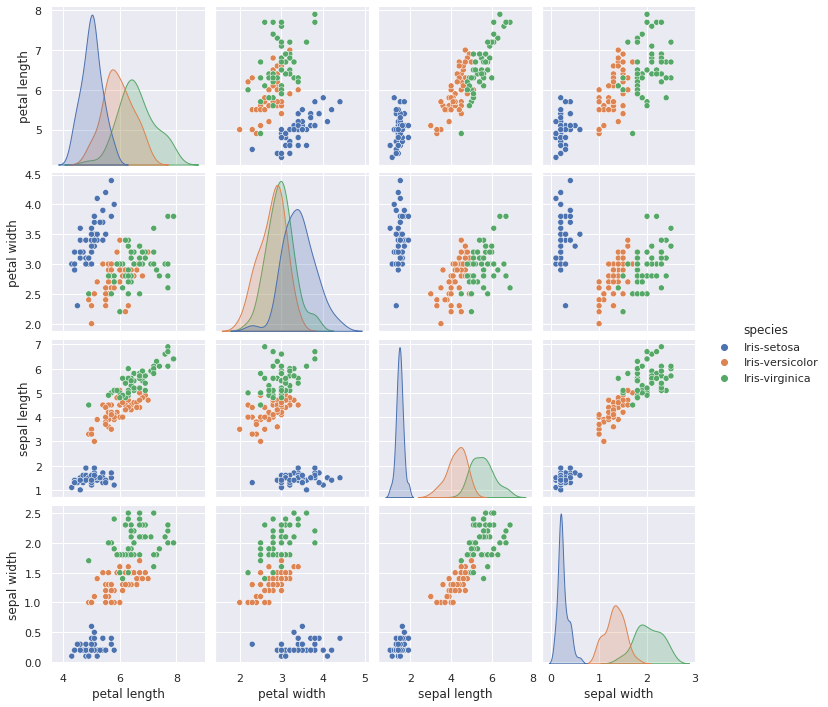

In [9]:
# Instead of analyzing each pair of varibales we can generate "scatter matrix",
# which is a matrix with show dpendency of ALL PAIRS of variables
pd.plotting.scatter_matrix(iris, figsize=(8, 8), 
                           color = iris['species'].apply(lambda x: colors[x]));
plt.show()
 
# Here is similiar plot, but generated by function parplot from seaborn package
import seaborn as sns
sns.set()
sns.pairplot(iris, hue="species")

We can notice that data is linear, so I'm going to use linear regression model

In [10]:
# importing module from scikit learn library
from sklearn.linear_model import LinearRegression

# split dfata into features(x) nad labels (y)
x = iris.iloc[:, :4]
y = iris.loc[:, 'species']

# dictionary allowing to color points on diagram
categories = {'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3}
y = y.apply(lambda x: categories[x])

x.head()
y.head()

# model is created here
# this model uses ordinary least squares method
lr = LinearRegression()
lr.fit(x.to_numpy() ,y)
lr.score(x.to_numpy() ,y)

0.9304223675331595

Score ~0.93 is great result. Let's see how randomly created data will be assigned to the species.

In [11]:
# random data that need to be evaluated
iris_1 = [5, 3.5, 1.4, 0.2]
iris_2 = [6.4, 3, 3.5, 1]
iris_3 = [6, 3, 5, 2]
other = [1, 2, 3, 4]
flowers = [iris_1, iris_2, iris_3, other]

# running prediction
prediction = lr.predict(flowers)
print(prediction)

# values of prediction is a number
# but prediction was supposed to categorize flowers to species
# so we have to change output type into categorical 
for f, s in zip(flowers, prediction):
    if round(s) == 1:
        print('Flower {} is {}'.format(f, 'Iris-setosa'))
    elif round(s) == 2:
        print('Flower {} is {}'.format(f, 'Iris-versicolor'))
    elif round(s) == 3:
        print('Flower {} is {}'.format(f, 'Iris-virginica'))
    else:
        print('Flower {} is {}'.format(f, 'Unknown'))

[0.92831587 1.76141625 2.75570903 4.11444226]
Flower [5, 3.5, 1.4, 0.2] is Iris-setosa
Flower [6.4, 3, 3.5, 1] is Iris-versicolor
Flower [6, 3, 5, 2] is Iris-virginica
Flower [1, 2, 3, 4] is Unknown
